# Challenge 1
## Spaceship Titanic

The first challenge from Kaggle to predict whether passengers are transported to other planets using their information. [Link](https://www.kaggle.com/competitions/spaceship-titanic/overview)



In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder

In [69]:
df = pd.read_csv('train.csv')
df

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


### Data exploration

- The number of missing data
- The ratio of outcome variable

In [70]:
df.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

Too many missing values in the df. 3 strategies are available.

1. Just drop out
2. Mode imputation
3. Algorithmic imputation (e.g. KNN imputation)

In [71]:
df_clean = df.dropna()

In [84]:
df_x = df_clean.iloc[:, :-1]
df_y = df_clean.iloc[:, -1]

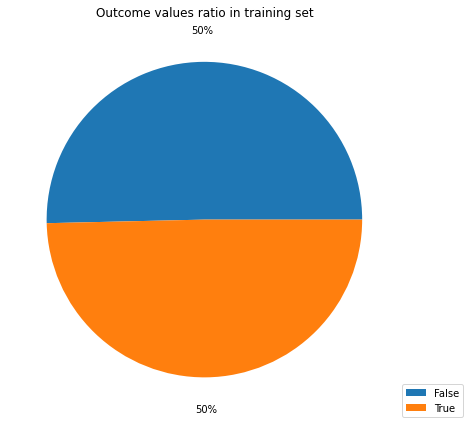

In [85]:
fig, axes = plt.subplots(1, 1, figsize=(8,6), sharex=False, sharey=False)    
labels = ['False', 'True']

x = df_y
title = 'Outcome values ratio in training set'
axes.pie(x.value_counts(),  autopct='%1.0f%%', pctdistance=1.2)
axes.set_title(title)

plt.legend(loc=(1,0), labels=labels)
plt.tight_layout();
plt.show()

Since there is equal ratio between outcome variables, do not need to balance them.

In [86]:
df_x

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre


65

In [97]:
ids = df_x.loc[:,'PassengerId']
cabins = df_x.loc[:, 'Cabin']
passenger_groups = list()
for id in ids:
    group = int(id.split('_')[0])
    passenger_groups.append(group)

decks = list()
nums = list()
side = list()
for c in cabins:
    sections = c.split('/')
    decks.append(ord(sections[0]) - 65)
    nums.append(int(sections[1]))
    if sections[2] == 'P':
        side.append(0)
    else:
        side.append(1)

train_x = df_x.drop(['PassengerId', 'Cabin', 'Name'], axis=1)
train_x['PassengerGroups'] = passenger_groups
train_x['Deck'] = decks
train_x['SeatNumber'] = nums
train_x['SeatSide'] = side
train_x

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,PassengerGroups,Deck,SeatNumber,SeatSide
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,1,1,0,0
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,2,5,0,1
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,3,0,0,1
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,3,0,0,1
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,4,5,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,Europa,False,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,9276,0,98,0
8689,Earth,True,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,9278,6,1499,1
8690,Earth,False,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,9279,6,1500,1
8691,Europa,False,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,9280,4,608,1


In [98]:
homeplanet_encoder = LabelEncoder()
homeplanet_encoder.fit(train_x.HomePlanet)
train_x.HomePlanet = homeplanet_encoder.transform(np.ravel(train_x.HomePlanet))

cryo_encoder = LabelEncoder()
cryo_encoder.fit(train_x.CryoSleep)
train_x.CryoSleep = cryo_encoder.transform(np.ravel(train_x.CryoSleep))

dest_encoder = LabelEncoder()
dest_encoder.fit(train_x.Destination)
train_x.Destination = dest_encoder.transform(np.ravel(train_x.Destination))

vip_encoder = LabelEncoder()
vip_encoder.fit(train_x.VIP)
train_x.VIP = vip_encoder.transform(np.ravel(train_x.VIP))
train_x

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,PassengerGroups,Deck,SeatNumber,SeatSide
0,1,0,2,39.0,0,0.0,0.0,0.0,0.0,0.0,1,1,0,0
1,0,0,2,24.0,0,109.0,9.0,25.0,549.0,44.0,2,5,0,1
2,1,0,2,58.0,1,43.0,3576.0,0.0,6715.0,49.0,3,0,0,1
3,1,0,2,33.0,0,0.0,1283.0,371.0,3329.0,193.0,3,0,0,1
4,0,0,2,16.0,0,303.0,70.0,151.0,565.0,2.0,4,5,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,1,0,0,41.0,1,0.0,6819.0,0.0,1643.0,74.0,9276,0,98,0
8689,0,1,1,18.0,0,0.0,0.0,0.0,0.0,0.0,9278,6,1499,1
8690,0,0,2,26.0,0,0.0,0.0,1872.0,1.0,0.0,9279,6,1500,1
8691,1,0,0,32.0,0,0.0,1049.0,0.0,353.0,3235.0,9280,4,608,1


In [99]:
encoder = LabelEncoder()
encoder.fit([0, 1])
train_y = encoder.transform(np.ravel(train_y))
train_y

array([0, 1, 0, ..., 1, 0, 1])

In [47]:
from sklearn.linear_model import LogisticRegression

In [100]:
random_seed = 42

clf = LogisticRegression(random_state=random_seed).fit(train_x, train_y)

/home/changhyun/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [101]:
y_pred = clf.predict(train_x)

In [107]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, roc_auc_score

              precision    recall  f1-score   support

           0       0.83      0.73      0.78      3279
           1       0.76      0.85      0.80      3327

    accuracy                           0.79      6606
   macro avg       0.79      0.79      0.79      6606
weighted avg       0.79      0.79      0.79      6606



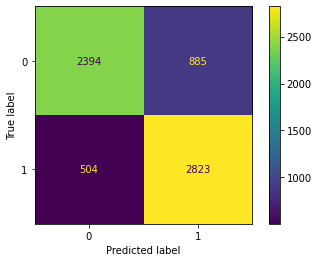

ROC Score: 0.7893064067840516


In [108]:
class_names  =[0, 1]
cm = confusion_matrix(train_y, y_pred, labels=class_names)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)    
disp.plot()

print(classification_report(train_y, y_pred))
plt.show()

print('ROC Score:', roc_auc_score(train_y, y_pred))